In [2]:
import heron
from heron.likelihood import TimeDomainLikelihood, TimeDomainLikelihoodModelUncertainty
from heron.models.testing import SineGaussianWaveform, FlatPSD
from heron.detector import AdvancedLIGOHanford, AdvancedLIGOLivingston

/home/daniel/repositories/ligo/heron/heron/models/__init__.py:3: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import antenna, MSUN_SI


In [3]:
test_waveform = SineGaussianWaveform()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import coordinates as coords
import astropy.units as u

In [5]:
data = test_waveform.time_domain(
    {"width": 0.05}
)

/home/daniel/miniconda3/envs/heron/lib/python3.13/site-packages/gwpy/types/series.py:131: UserWarning: xindex was given to TimeSeries(), x0 will be ignored
  warn("xindex was given to %s(), x0 will be ignored"


In [6]:
location = coords.SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

In [7]:
position = {"ra": float(location.ra.to(u.radian).value),
            "dec": float(location.dec.to(u.radian).value),
            "psi": 0,
            "iota": 0,
            "phi_0": 0
}

In [8]:
injection = data.project(detector=AdvancedLIGOHanford(), **position)

In [9]:
likelihood = TimeDomainLikelihood(data=injection,
                                  psd=FlatPSD(),
                                  detector=AdvancedLIGOHanford(),
                                  waveform=SineGaussianWaveform(),
)                                  

In [10]:
widths = np.linspace(0.01, 0.1, 100)
likelihoods = []
for w in widths:
    position.update({"width": w, "theta_jn": 0, "phase": 0})
    likelihoods.append(likelihood(position))

The following keys were not recognised {'iota', 'phi_0'}
W 1.1467619703807925e+51  N -111234.5506800857
W 9.991652674619548e+50  N -111234.5506800857
W 8.759371959962592e+50  N -111234.5506800857
W 7.716829230185607e+50  N -111234.5506800857
W 6.825089676071731e+50  N -111234.5506800857
W 6.0553163243535465e+50  N -111234.5506800857
W 5.385673225674961e+50  N -111234.5506800857
W 4.7993061391791155e+50  N -111234.5506800857
W 4.282986304107845e+50  N -111234.5506800857
W 3.82617588942069e+50  N -111234.5506800857
W 3.42036937721556e+50  N -111234.5506800857
W 3.0586201010843974e+50  N -111234.5506800857
W 2.735193819504327e+50  N -111234.5506800857
W 2.4453111936424004e+50  N -111234.5506800857
W 2.184953600953453e+50  N -111234.5506800857
W 1.950714799381178e+50  N -111234.5506800857
W 1.7396862706309745e+50  N -111234.5506800857
W 1.5493676320692382e+50  N -111234.5506800857
W 1.3775959357049115e+50  N -111234.5506800857
W 1.222489356236807e+50  N -111234.5506800857
W 1.0824019543888

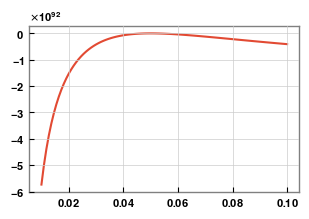

In [11]:
plt.plot(widths, likelihoods)

In [ ]:
frequencies = np.linspace(100, 500, 50)
widths = np.linspace(0.01, 0.1, 50)

likelihood_grid = np.zeros((len(frequencies), len(widths)))

for i, freq in enumerate(frequencies):
    for j, w in enumerate(widths):
        position.update({"width": w, "frequency": freq, "theta_jn": 0, "phase": 0})
        likelihood_grid[i, j] = likelihood(position)

plt.figure(figsize=(10, 6))
plt.contourf(widths, frequencies, likelihood_grid, levels=20, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('2D Likelihood Contour Plot')
plt.show()

W 5.188257272521487e+50  N -111234.5506800857
W 5.040302142789809e+50  N -111234.5506800857
W 4.901868359731804e+50  N -111234.5506800857
W 4.773467947201015e+50  N -111234.5506800857
W 4.656200890053133e+50  N -111234.5506800857
W 4.551295882229682e+50  N -111234.5506800857
W 4.459085617716135e+50  N -111234.5506800857
W 4.378938956906398e+50  N -111234.5506800857
W 4.309600847183284e+50  N -111234.5506800857
W 4.249571194933583e+50  N -111234.5506800857
W 4.197374452674073e+50  N -111234.5506800857
W 4.151700435274432e+50  N -111234.5506800857
W 4.111450121622802e+50  N -111234.5506800857
W 4.075728293702109e+50  N -111234.5506800857
W 4.043814213896328e+50  N -111234.5506800857
W 4.015128054707908e+50  N -111234.5506800857
W 3.989200859222916e+50  N -111234.5506800857
W 3.965650242959253e+50  N -111234.5506800857
W 3.9441615909323094e+50  N -111234.5506800857
W 3.924473734104354e+50  N -111234.5506800857
W 3.906368046659827e+50  N -111234.5506800857
W 3.889660093624986e+50  N -11123